In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df8 = pd.read_csv('Processed_data/coil8_data.csv', parse_dates = True, index_col=0)  # coil #1 table data

df8.index = pd.to_datetime(df8.index, format = "%d-%m-%Y_%H-%M-%S")


In [42]:
df6 = df8.copy()
df6 [["Sensor_1_dir_x",'Sensor_2_dir_x', 'Sensor_3_dir_x', 'Sensor_4_dir_x',
       'Sensor_5_dir_x' , 'Sensor_6_dir_x', 'Sensor_7_dir_x', 'Sensor_8_dir_x',
       'Sensor_9_dir_x', 'Sensor_10_dir_x', 'Sensor_11_dir_x', 'Sensor_12_dir_x',
       'Sensor_13_dir_x', 'Sensor_14_dir_x', 'Sensor_15_dir_x', 'Sensor_16_dir_x'
       ]] = df6[["Sensor_1_dir_x",'Sensor_2_dir_x', 'Sensor_3_dir_x', 'Sensor_4_dir_x',
       'Sensor_5_dir_x' , 'Sensor_6_dir_x', 'Sensor_7_dir_x', 'Sensor_8_dir_x',
       'Sensor_9_dir_x', 'Sensor_10_dir_x', 'Sensor_11_dir_x', 'Sensor_12_dir_x',
       'Sensor_13_dir_x', 'Sensor_14_dir_x', 'Sensor_15_dir_x', 'Sensor_16_dir_x'
       ]]*-1
       
df6 [['sensor_1_X [mT]', 'sensor_2_X [mT]', 'sensor_3_X [mT]', 'sensor_4_X [mT]',
      'sensor_5_X [mT]', 'sensor_6_X [mT]', 'sensor_7_X [mT]', 'sensor_8_X [mT]',
      'sensor_9_X [mT]', 'sensor_10_X [mT]', 'sensor_11_X [mT]', 'sensor_12_X [mT]',
      'sensor_13_X [mT]', 'sensor_14_X [mT]', 'sensor_15_X [mT]', 'sensor_16_X [mT]'
       ]] = df6 [['sensor_1_X [mT]', 'sensor_2_X [mT]', 'sensor_3_X [mT]', 'sensor_4_X [mT]',
      'sensor_5_X [mT]', 'sensor_6_X [mT]', 'sensor_7_X [mT]', 'sensor_8_X [mT]',
      'sensor_9_X [mT]', 'sensor_10_X [mT]', 'sensor_11_X [mT]', 'sensor_12_X [mT]',
      'sensor_13_X [mT]', 'sensor_14_X [mT]', 'sensor_15_X [mT]', 'sensor_16_X [mT]'
       ]]*-1     

# swapping columns
df6["cmdCoilCurrent_6(A)"]= df6["cmdCoilCurrent_8(A)"]
df6["msdCoilCurrent_1(A)"], df6["msdCoilCurrent_5(A)"], df6["msdCoilCurrent_8(A)"] = df6["msdCoilCurrent_3(A)"], df6["msdCoilCurrent_4(A)"], df6["msdCoilCurrent_6(A)"]
df6["msdCoilTemp_1(degC)"], df6["msdCoilTemp_5(degC)"], df6["msdCoilTemp_8(degC)"] = df6["msdCoilTemp_3(degC)"], df6["msdCoilTemp_4(degC)"], df6["msdCoilTemp_6(degC)"]



In [43]:
# divide the data into single sweeps across the 3D space
df6_dic = {}
for i in range(-15,17,2):
    mask = df6['cmdCoilCurrent_6(A)'] == i
    df6_dic[i] = df6[mask]

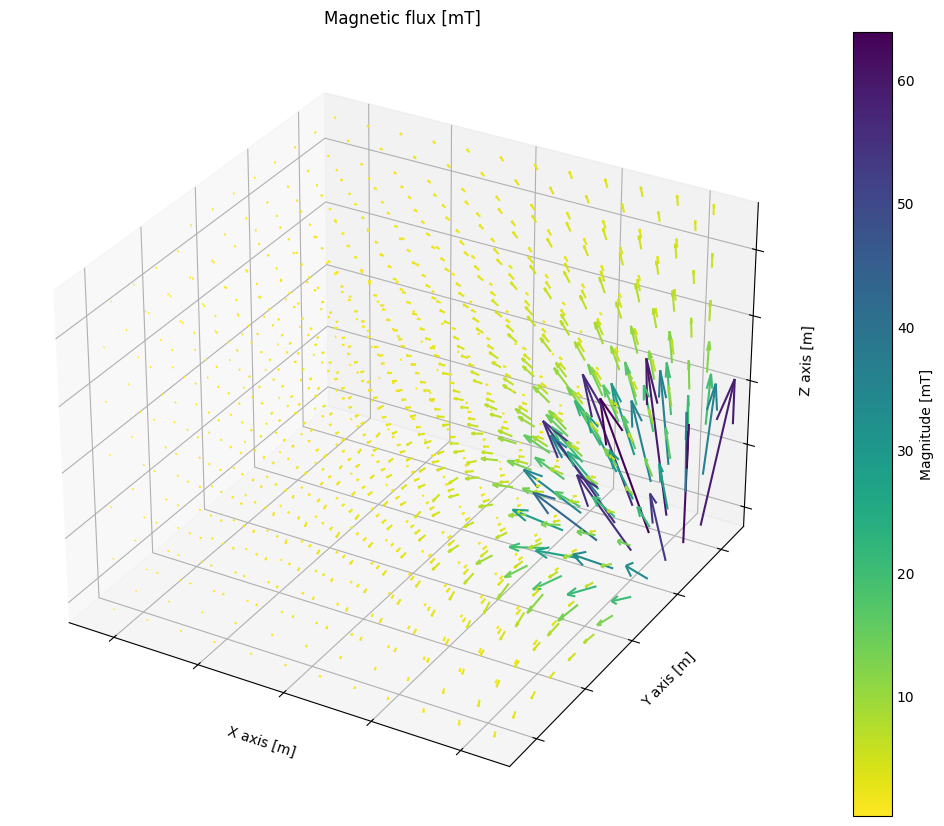

In [44]:
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('_mpl-gallery')

# Make data
n = 4
x = df6_dic[13][['Sensor_1_dir_x','Sensor_2_dir_x','Sensor_3_dir_x','Sensor_4_dir_x',
                'Sensor_5_dir_x','Sensor_6_dir_x','Sensor_7_dir_x','Sensor_8_dir_x',
                'Sensor_9_dir_x','Sensor_10_dir_x','Sensor_11_dir_x','Sensor_12_dir_x',
                'Sensor_13_dir_x','Sensor_14_dir_x','Sensor_15_dir_x','Sensor_16_dir_x']].values.reshape(-1, 1)
y = df6_dic[13][['Sensor_1_dir_y','Sensor_2_dir_y','Sensor_3_dir_y','Sensor_4_dir_y',
                'Sensor_5_dir_y','Sensor_6_dir_y','Sensor_7_dir_y','Sensor_8_dir_y',
                'Sensor_9_dir_y','Sensor_10_dir_y','Sensor_11_dir_y','Sensor_12_dir_y',
                'Sensor_13_dir_y','Sensor_14_dir_y','Sensor_15_dir_y','Sensor_16_dir_y']].values.reshape(-1, 1)
z = df6_dic[13][['Sensor_1_dir_z','Sensor_2_dir_z','Sensor_3_dir_z','Sensor_4_dir_z',
                'Sensor_5_dir_z','Sensor_6_dir_z','Sensor_7_dir_z','Sensor_8_dir_z',
                'Sensor_9_dir_z','Sensor_10_dir_z','Sensor_11_dir_z','Sensor_12_dir_z',
                'Sensor_13_dir_z','Sensor_14_dir_z','Sensor_15_dir_z','Sensor_16_dir_z']].values.reshape(-1, 1)

# X, Y, Z = np.meshgrid(x, y, z)

U = df6_dic[13][['sensor_1_X [mT]','sensor_2_X [mT]','sensor_3_X [mT]','sensor_4_X [mT]',
                'sensor_5_X [mT]','sensor_6_X [mT]','sensor_7_X [mT]','sensor_8_X [mT]',
                'sensor_9_X [mT]','sensor_10_X [mT]','sensor_11_X [mT]','sensor_12_X [mT]',
                'sensor_13_X [mT]','sensor_14_X [mT]','sensor_15_X [mT]','sensor_16_X [mT]',]].values.reshape(-1, 1)

V = df6_dic[13][['sensor_1_Y [mT]','sensor_2_Y [mT]','sensor_3_Y [mT]','sensor_4_Y [mT]',
                'sensor_5_Y [mT]','sensor_6_Y [mT]','sensor_7_Y [mT]','sensor_8_Y [mT]',
                'sensor_9_Y [mT]','sensor_10_Y [mT]','sensor_11_Y [mT]','sensor_12_Y [mT]',
                'sensor_13_Y [mT]','sensor_14_Y [mT]','sensor_15_Y [mT]','sensor_16_Y [mT]',]].values.reshape(-1, 1)


W = df6_dic[13][['sensor_1_Z [mT]','sensor_2_Z [mT]','sensor_3_Z [mT]','sensor_4_Z [mT]',
                'sensor_5_Z [mT]','sensor_6_Z [mT]','sensor_7_Z [mT]','sensor_8_Z [mT]',
                'sensor_9_Z [mT]','sensor_10_Z [mT]','sensor_11_Z [mT]','sensor_12_Z [mT]',
                'sensor_13_Z [mT]','sensor_14_Z [mT]','sensor_15_Z [mT]','sensor_16_Z [mT]',]].values.reshape(-1, 1)

# Compute the magnitude of the vectors
magnitude = np.sqrt(U**2 + V**2 + W**2)

# Normalize the magnitudes to the range [0, 1]
norm = Normalize(vmin=magnitude.min(), vmax=magnitude.max())

# Create a colormap object
colormap = cm.viridis_r  # You can choose other colormaps like 'plasma', 'inferno', etc.


# Plot
# Create a figure with custom size
fig = plt.figure(figsize=(12, 8))  # Set figure size
ax = fig.add_subplot(111, projection='3d')

plot = ax.quiver(x, y, z, U, V, W, length=0.002, normalize= False, color=colormap(norm(magnitude)))

# Add a colorbar to show the mapping of magnitudes to colors
mappable = cm.ScalarMappable(norm=norm, cmap=colormap)
cbar = plt.colorbar(mappable, ax=ax)
cbar.set_label('Magnitude [mT]')

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[],
       xlabel = ('X axis [m]'),
       ylabel = ('Y axis [m]'),
       zlabel = ('Z axis [m]'),
       title = ('Magnetic flux [mT]'))

plt.show()

In [45]:
#save data
# Create an empty DataFrame
concatenated_df6 = pd.DataFrame()

for i in range(-15,17,2):
    # Concatenate DataFrames along rows (default axis=0)
    concatenated_df6 = pd.concat([concatenated_df6, df6_dic[i]], axis=0)
    
# Save the concatenated DataFrame to a CSV file
concatenated_df6.to_csv('Processed_data/coil6_data.csv', index=True)  # index=True to include datetime index